# ML Result

* fnn
* fnn_rssi
* encoder
* encoder_rssi

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from dataset import *

### loss/epoch

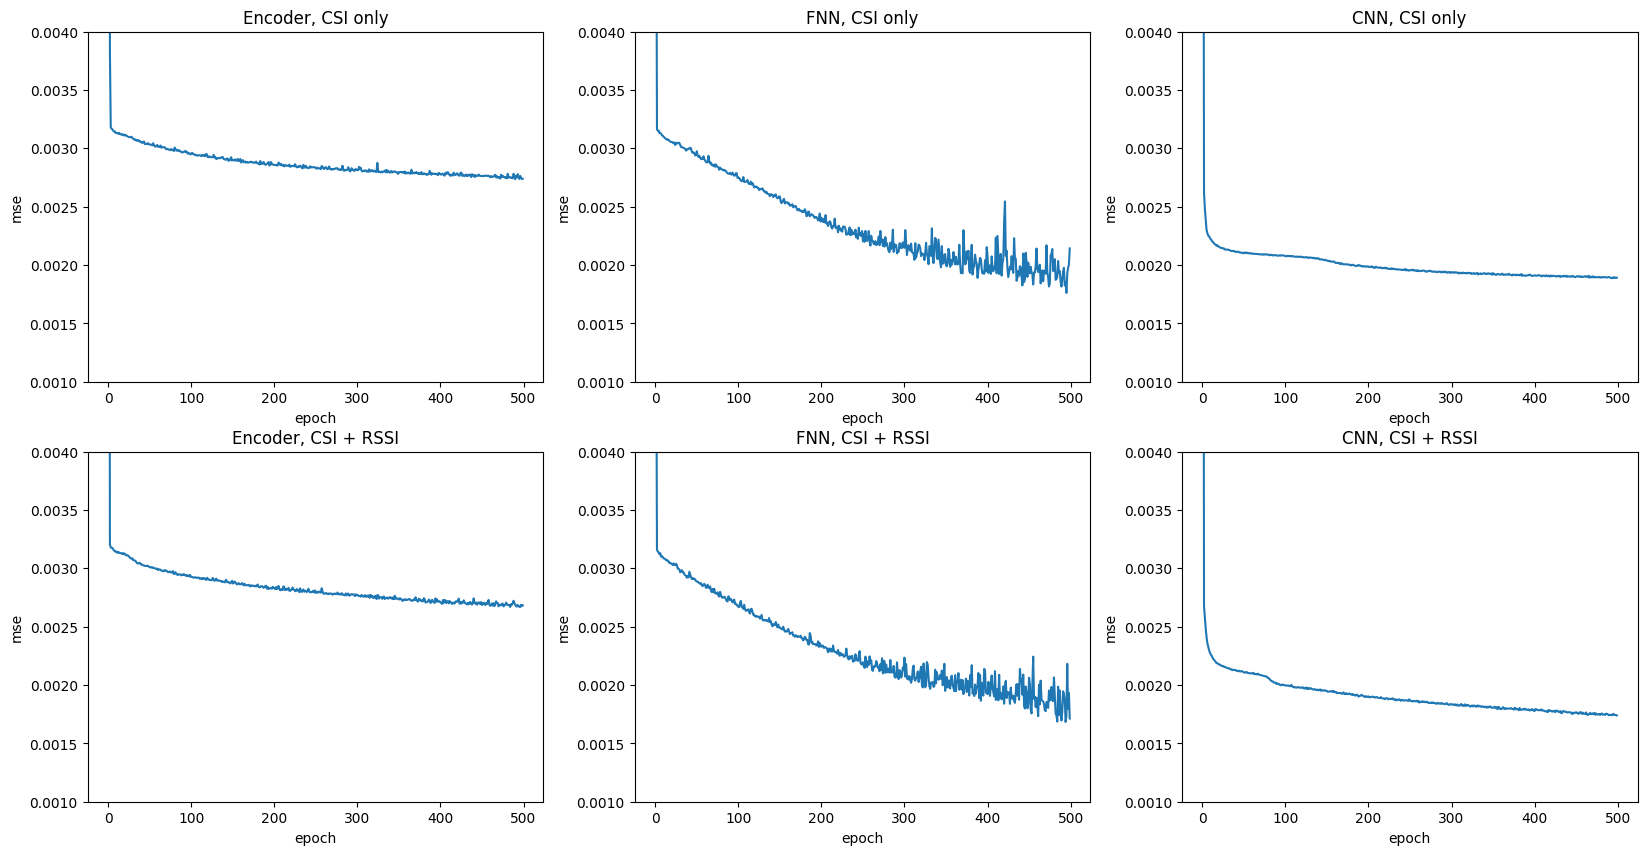

In [2]:
plt.figure(figsize=(20,10))

losses = np.load('encoder/losses.npy')
plt.subplot(2,3,1)
plt.ylim(0.001,0.004)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('encoder_rssi/losses.npy')
plt.subplot(2,3,4)
plt.ylim(0.001,0.004)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI + RSSI')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('fnn/losses.npy')
plt.subplot(2,3,2)
plt.ylim(0.001,0.004)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('fnn_rssi/losses.npy')
plt.subplot(2,3,5)
plt.ylim(0.001,0.004)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI + RSSI')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('cnn_basic/losses.npy')
plt.subplot(2,3,3)
plt.ylim(0.001,0.004)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('crnet/losses.npy')
plt.subplot(2,3,6)
plt.ylim(0.001,0.004)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI + RSSI')
plt.ylabel('mse')
plt.xlabel('epoch')


plt.show()

In [3]:
def dot_inter(x,y,inter,max,color = 'm',marker = '^'):
    for i in range(-1,max,inter):
        scatter = plt.scatter(x[i]+1,y[i],edgecolor=color, facecolor='white',marker=marker, s=100, alpha=1.0, zorder=2)

In [4]:
def smooth_curve(points, factor=0.7):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

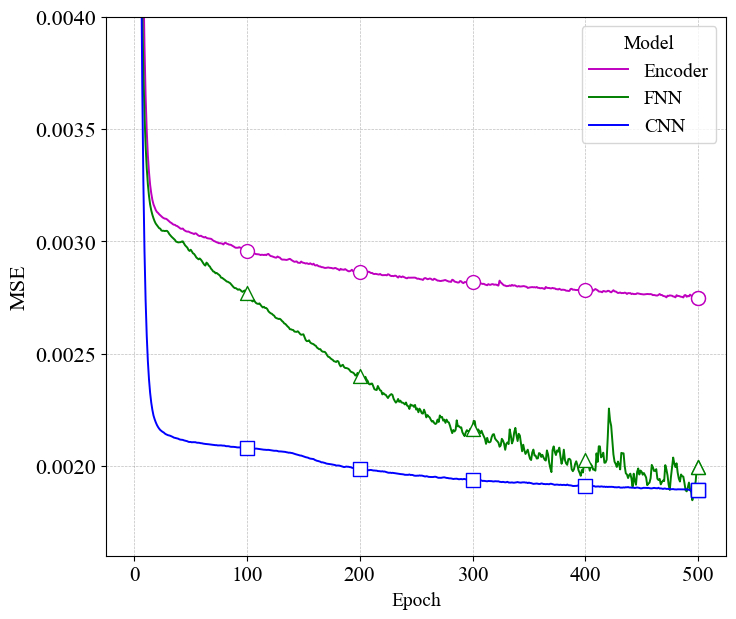

In [5]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['lines.linewidth'] = 1.4
plt.figure(figsize=(8,7))
#plt.subplot(1,2,1)
plt.ylim(0.001,0.004)
losses1 = np.load('encoder/losses.npy')
plt.plot(losses1[0],smooth_curve(losses1[1]),label="Encoder",color='m')
losses2 = np.load('fnn/losses.npy')
plt.plot(losses2[0],smooth_curve(losses2[1]),label="FNN",color="g")
losses3 = np.load('cnn_basic/losses.npy')
plt.plot(losses3[0],smooth_curve(losses3[1]),label="CNN",color='b')
legend = plt.legend(title = "Model",loc='upper right',fontsize = 14)
plt.setp(legend.get_title(), fontsize=14)
plt.xticks(fontsize=15)

dot_inter(losses1[0],smooth_curve(losses1[1]),100,500,color='m',marker='o')
dot_inter(losses2[0],smooth_curve(losses2[1]),100,500,color='g',marker='^')
dot_inter(losses3[0],smooth_curve(losses3[1]),100,500,color='b',marker='s')



plt.ylabel('MSE',fontsize = 16)
plt.xlabel('Epoch',fontsize = 14)
#plt.yscale('log')
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which="minor", axis='y')
"""
plt.subplot(1,2,2)
plt.ylim(0.001,0.004)
losses = np.load('encoder_rssi/losses.npy')
plt.plot(losses[0],losses[1],label="Encoder")
losses = np.load('fnn_rssi/losses.npy')
plt.plot(losses[0],losses[1],label="FNN")
losses = np.load('crnet/losses.npy')
plt.plot(losses[0],losses[1],label="CNN")
plt.title('CSI + RSSI')
plt.legend(title = "Model",loc='upper right')
plt.ylabel('MSE')
plt.xlabel('Epoch')
"""
plt.savefig('output.png', dpi=300)
plt.show()

### testing

#### demo

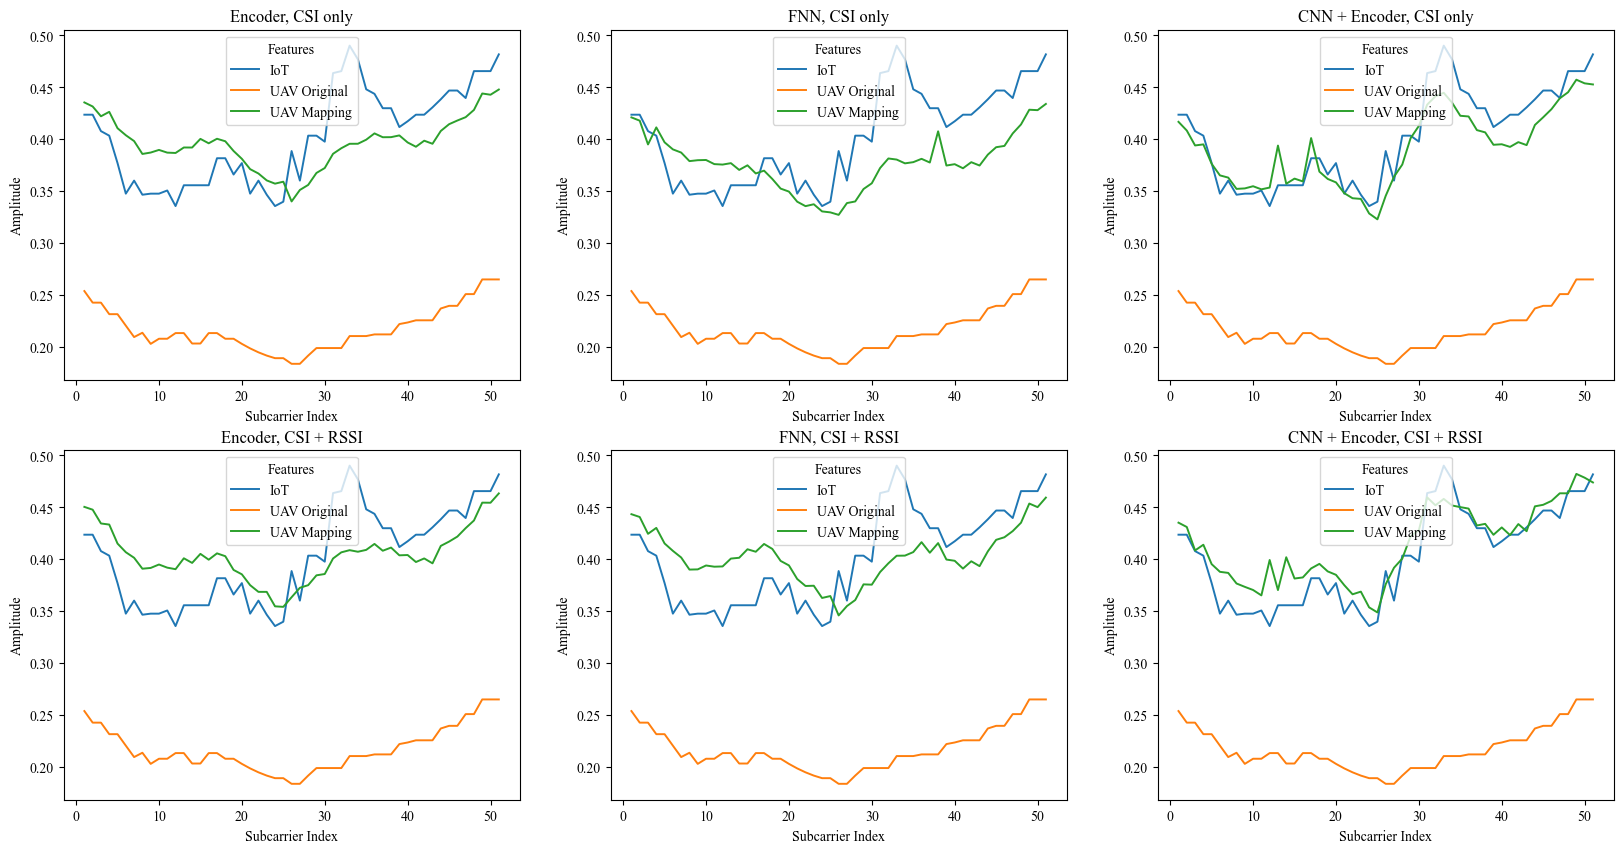

In [6]:
plot_index = 1010
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
testset = np.load("normalized_testing_set.npy")
model = torch.load('encoder/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('Encoder, CSI only')

plt.subplot(2,3,4)
testset = np.load("normalized_testing_set.npy")
model = torch.load('encoder_rssi/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[1:]
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('Encoder, CSI + RSSI')

plt.subplot(2,3,2)
testset = np.load("normalized_testing_set.npy")
model = torch.load('fnn/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('FNN, CSI only')

plt.subplot(2,3,5)
testset = np.load("normalized_testing_set.npy")
model = torch.load('fnn_rssi/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[1:]
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('FNN, CSI + RSSI')


plt.subplot(2,3,3)
testset = np.load("normalized_testing_set.npy")
model = torch.load('cnn_basic/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0]
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('CNN + Encoder, CSI only')

plt.subplot(2,3,6)
testset = np.load("normalized_testing_set.npy")
model = torch.load('crnet/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0][1:]
uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('CNN + Encoder, CSI + RSSI')



plt.show()

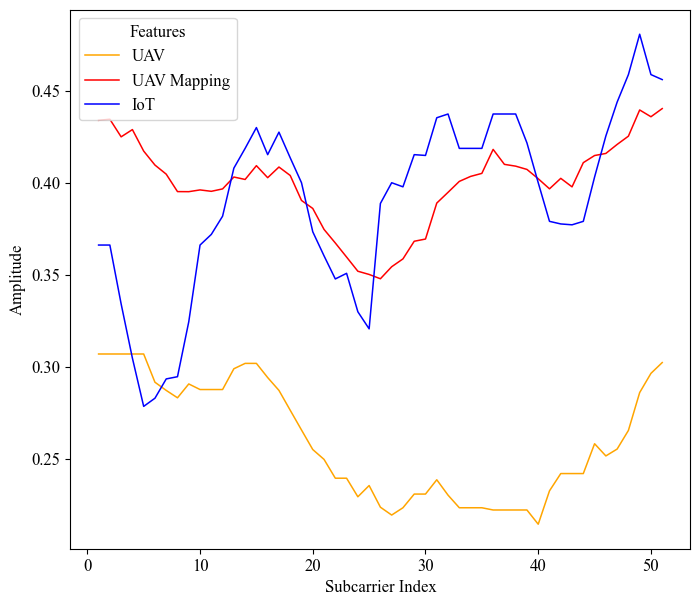

In [7]:
plt.rcParams['lines.linewidth'] = 1.1
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,7))
plot_index = 255
testset = np.load("normalized_testing_set.npy")
model = torch.load('encoder/model100.pth')
model.to("cpu")
model.eval()
d_s = csi_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data
uav_modify = model(data).detach().numpy()

plt.plot(index,uav_original,label = "UAV",color = 'orange')
plt.plot(index,uav_modify,label = "UAV Mapping",color="red")
plt.plot(index,iot_original,label = "IoT",color="blue")
plt.legend(title = "Features",loc='upper left')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.savefig('encoder.png', dpi=300)
plt.show()

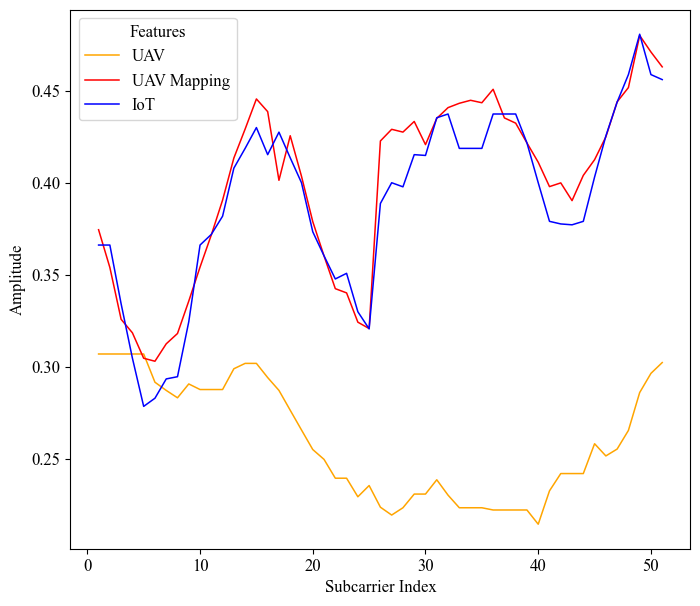

In [8]:
plt.rcParams['lines.linewidth'] = 1.1
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,7))
plot_index = 255
testset = np.load("normalized_testing_set.npy")
model = torch.load('cnn_basic/model100.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0]
uav_modify = model(data).detach().numpy()

plt.plot(index,uav_original,label = "UAV",color = 'orange')
plt.plot(index,uav_modify,label = "UAV Mapping",color="red")
plt.plot(index,iot_original,label = "IoT",color="blue")
plt.legend(title = "Features",loc='upper left')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.savefig('cnn.png', dpi=300)
plt.show()

#### test mse

In [9]:
import training_core

In [10]:
testset = np.load("normalized_training_set.npy")

test_csi_loader = DataLoader(csi_dataset(testset),batch_size=1)
test_csi_rssi_loader = DataLoader(csi_rssi_dataset(testset),batch_size=1)
test_cnn_loader = DataLoader(csi_cnn_dataset(testset),batch_size=1)
test_rssi_cnn_loader = DataLoader(csi_rssi_cnn_dataset(testset),batch_size=1)

encoder_model = torch.load('encoder/model_final.pth')

encoder_loss = training_core.testing(encoder_model,test_csi_loader)

encoder_rssi_model = torch.load('encoder_rssi/model_final.pth')

encoder_rssi_loss = training_core.testing(encoder_rssi_model,test_csi_rssi_loader)

fnn_model = torch.load('fnn/model_final.pth')

fnn_loss = training_core.testing(fnn_model,test_csi_loader)

fnn_rssi_model = torch.load('fnn_rssi/model_final.pth')

fnn_rssi_loss = training_core.testing(fnn_rssi_model,test_csi_rssi_loader)

cnn_basic_model = torch.load('cnn_basic/model_final.pth')

cnn_basic_loss = training_core.testing(cnn_basic_model,test_cnn_loader)

crnet_model = torch.load('crnet/model_final.pth')

crnet_loss = training_core.testing(crnet_model,test_rssi_cnn_loader)

c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 51])) that is different to the input size (torch.Size([51])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


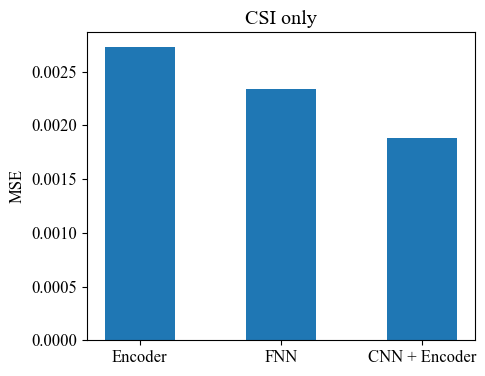

In [11]:
plt.figure(figsize=(5,4))
h = [encoder_loss,fnn_loss,cnn_basic_loss]
x = [i for i in range(3)]
label = ['Encoder','FNN','CNN + Encoder']
plt.bar(x,h,tick_label=label,width=0.5)
plt.ylabel('MSE')
plt.title('CSI only')
plt.show()

In [12]:
def test_mul(folder,d_loader):
    losses = []
    for i in range(100,501,100):
        model_str = folder + '/model'+str(i)+".pth"
        model = torch.load(model_str)
        losses.append(training_core.testing(model,d_loader))
    return losses

In [13]:
testset = np.load("normalized_testing_set.npy")

test_csi_loader = DataLoader(csi_dataset(testset),batch_size=16)

test_cnn_loader = DataLoader(csi_cnn_dataset(testset),batch_size=16)

encoder_losses = test_mul('encoder',test_csi_loader)

fnn_losses = test_mul('fnn',test_csi_loader)

cnn_losses = test_mul('cnn_basic',test_cnn_loader)

In [14]:
print(encoder_losses)
print(fnn_losses)
print(cnn_losses)

[0.003024143771594995, 0.0030981253253525823, 0.0032039573945274406, 0.00326716363378619, 0.003297588372959864]
[0.0031552775649583667, 0.003742589421007879, 0.003710039101341473, 0.0036322246668497463, 0.003336794303984127]
[0.0017143338570951834, 0.001699157614811239, 0.0017339120813276523, 0.001813038767091688, 0.001857665288050405]


In [15]:
def dot_inter(x,y,inter,max,color = 'm',marker = '^'):
    for i in range(0,max,inter):
        scatter = plt.scatter(x[i],y[i],edgecolor=color, facecolor='white',marker=marker, s=100, alpha=1.0, zorder=2)

[100, 200, 300, 400, 500]


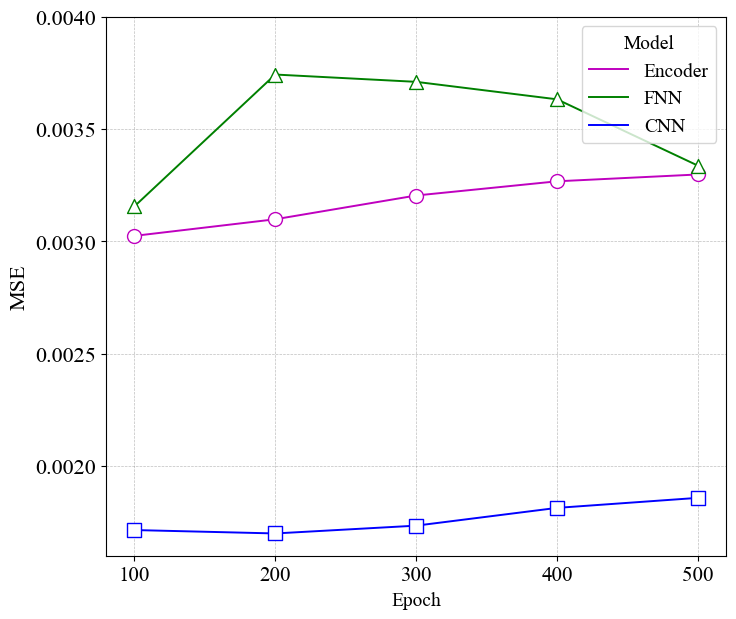

In [16]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['lines.linewidth'] = 1.4
plt.figure(figsize=(8,7))
#plt.subplot(1,2,1)
plt.ylim(0.0016,0.004)
xindex = [i for i in range(100,501,100)]
print(xindex)
losses1 = encoder_losses
plt.plot(xindex,losses1,label="Encoder",color='m')
losses2 =fnn_losses
plt.plot(xindex,losses2,label="FNN",color="g")
losses3 = cnn_losses
plt.plot(xindex,losses3,label="CNN",color='b')
legend = plt.legend(title = "Model",loc='upper right',fontsize = 14)
plt.setp(legend.get_title(), fontsize=14)
plt.xticks(np.arange(0, 501, 100),fontsize=15)

dot_inter(xindex,losses1,1,5,color='m',marker='o')
dot_inter(xindex,losses2,1,5,color='g',marker='^')
dot_inter(xindex,losses3,1,5,color='b',marker='s')



plt.ylabel('MSE',fontsize = 16)
plt.xlabel('Epoch',fontsize = 14)
#plt.yscale('log')
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which="minor", axis='y')

plt.savefig('output1.png', dpi=300)
plt.show()

In [17]:
testset = np.load("normalized_testing_set.npy")

test_csi_loader = DataLoader(csi_dataset(testset),batch_size=1)

test_cnn_loader = DataLoader(csi_cnn_dataset(testset),batch_size=1)


encoder_model = torch.load('encoder/model100.pth')

encoder_loss = training_core.testing(encoder_model,test_csi_loader)


fnn_model = torch.load('fnn/model100.pth')

fnn_loss = training_core.testing(fnn_model,test_csi_loader)


cnn_basic_model = torch.load('cnn_basic/model100.pth')

cnn_basic_loss = training_core.testing(cnn_basic_model,test_cnn_loader)



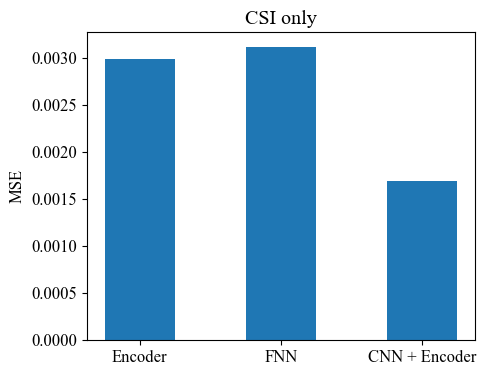

In [18]:
plt.figure(figsize=(5,4))
h = [encoder_loss,fnn_loss,cnn_basic_loss]
x = [i for i in range(3)]
label = ['Encoder','FNN','CNN + Encoder']
plt.bar(x,h,tick_label=label,width=0.5)
plt.ylabel('MSE')
plt.title('CSI only')
plt.show()

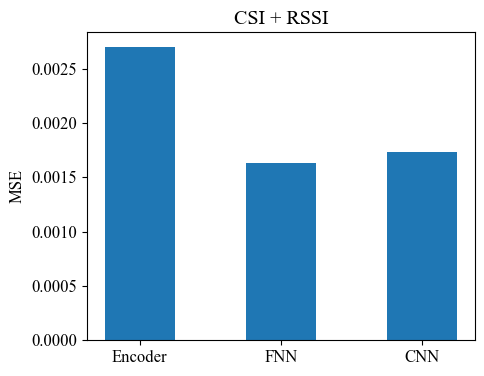

In [19]:
plt.figure(figsize=(5,4))
h = [encoder_rssi_loss,fnn_rssi_loss,crnet_loss]
x = [i for i in range(3)]
label = ['Encoder','FNN','CNN']
plt.bar(x,h,tick_label=label,width=0.5)
plt.ylabel('MSE')
plt.title('CSI + RSSI')
plt.show()

In [20]:
import eval

#encoder
raw_kdr, encoder_kdr  = eval.KDR(encoder_model,test_csi_loader,2,13)
#_,encoder_rssi_kdr = eval.KDR(encoder_rssi_model,test_csi_rssi_loader,2,13)
#fnn
_,fnn_kdr = eval.KDR(fnn_model,test_csi_loader,2,13)
#_,fnn_rssi_kdr = eval.KDR(fnn_rssi_model,test_csi_rssi_loader,2,13)
#cnn
_,cnn_kdr = eval.KDR(cnn_basic_model,test_cnn_loader,2,13)
#_,cnn_rssi_kdr = eval.KDR(crnet_model,test_rssi_cnn_loader,2,13)

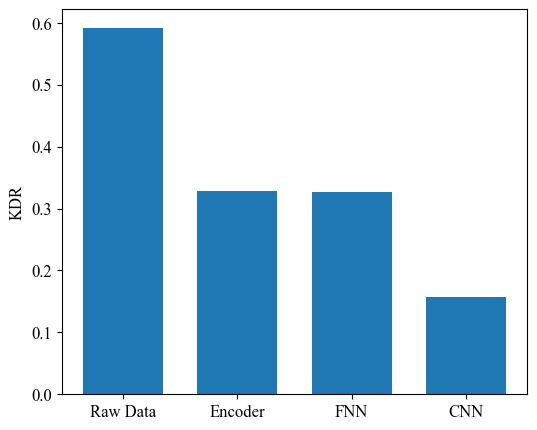

In [21]:
plt.figure(figsize=(6,5))
h = [raw_kdr,encoder_kdr,fnn_kdr,cnn_kdr]
x = [i for i in range(4)]
label = ['Raw Data','Encoder','FNN','CNN']
plt.bar(x,h,tick_label=label,width=0.7)
plt.ylabel('KDR')

plt.show()

# CSI only, CNN + Encoder

In [22]:
import eval
raw_kdr_kgr = [eval.KDR(cnn_basic_model,test_cnn_loader,2,13,i)[0] for i in range(10)]
cnn_kdr_kgr = [eval.KDR(cnn_basic_model,test_cnn_loader,2,13,i)[1] for i in range(10)]
fnn_kdr_kgr = [eval.KDR(fnn_model,test_csi_loader,2,13,i)[1] for i in range(10)]
encoder_kdr_kgr = [eval.KDR(encoder_model,test_csi_loader,2,13,i)[1] for i in range(10)]


In [23]:
def dot_inter(x,y,inter,max,color = 'm',marker = '^'):
    for i in range(0,max,inter):
        scatter = plt.scatter(x[i],y[i],edgecolor=color, facecolor='white',marker=marker, s=100, alpha=1.0, zorder=2)

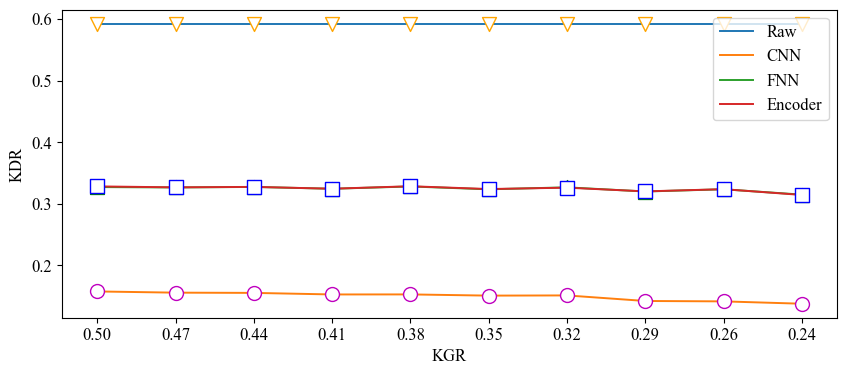

In [24]:
def KGR(nbit,gaurd):
    return (102-(2**nbit-1)*gaurd*nbit)/(nbit*102)

plt.figure(figsize=(10,4))
x = [i for i in range(10)]
plt.plot(x,raw_kdr_kgr,label='Raw')
plt.plot(x,cnn_kdr_kgr,label='CNN')
plt.plot(x,fnn_kdr_kgr,label="FNN")
plt.plot(x,encoder_kdr_kgr,label="Encoder")

dot_inter(x,raw_kdr_kgr,1,10,color='orange',marker='v')
dot_inter(x,cnn_kdr_kgr,1,10,color='m',marker='o')
dot_inter(x,fnn_kdr_kgr,1,10,color='g',marker='^')
dot_inter(x,encoder_kdr_kgr,1,10,color='b',marker='s')

plt.legend()


label = ["{:.2f}".format(KGR(2,i)) for i in x]

plt.xticks(x,labels=label)
#plt.yscale('log')
#plt.ylim(0.14,0.17)
plt.ylabel('KDR')
plt.xlabel('KGR')


plt.savefig('kgr_kdr.png', dpi=300)
plt.show()

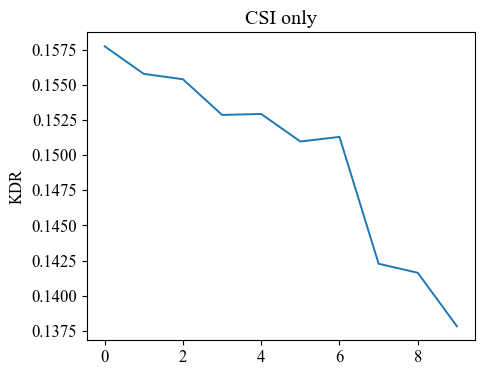

In [25]:
def KGR(gaurd):
    return (102-3*gaurd)/(2*102)


plt.figure(figsize=(5,4))
h = cnn_kdr_kgr
x = [i for i in range(10)]
label = [str(KGR(i)) for i in x]
plt.plot(x,h)
plt.ylabel('KDR')
plt.title('CSI only')
plt.show()

1228
[[422, tensor(-78.1789)], [977, tensor(-77.6822)], [1206, tensor(-77.0222)], [66, tensor(-76.9947)], [978, tensor(-76.2859)], [76, tensor(-76.0867)], [54, tensor(-75.7721)], [1099, tensor(-75.5838)], [588, tensor(-75.5141)], [1023, tensor(-75.5141)], [60, tensor(-75.4450)], [30, tensor(-75.1509)], [58, tensor(-75.1509)], [1162, tensor(-75.0401)], [879, tensor(-74.9742)], [202, tensor(-74.9088)], [166, tensor(-74.7149)], [59, tensor(-74.6511)], [984, tensor(-74.6511)], [420, tensor(-74.6299)], [146, tensor(-74.3790)], [909, tensor(-74.3172)], [1216, tensor(-74.1338)], [838, tensor(-73.7371)], [427, tensor(-73.6788)], [433, tensor(-73.6594)], [649, tensor(-73.6594)], [1215, tensor(-73.6594)], [976, tensor(-73.6015)], [429, tensor(-73.4296)], [597, tensor(-73.4296)], [762, tensor(-73.4296)], [242, tensor(-73.4106)], [975, tensor(-73.4106)], [96, tensor(-73.2788)], [320, tensor(-73.2788)], [741, tensor(-73.2788)], [926, tensor(-73.2788)], [934, tensor(-73.2788)], [1, tensor(-73.2601)]

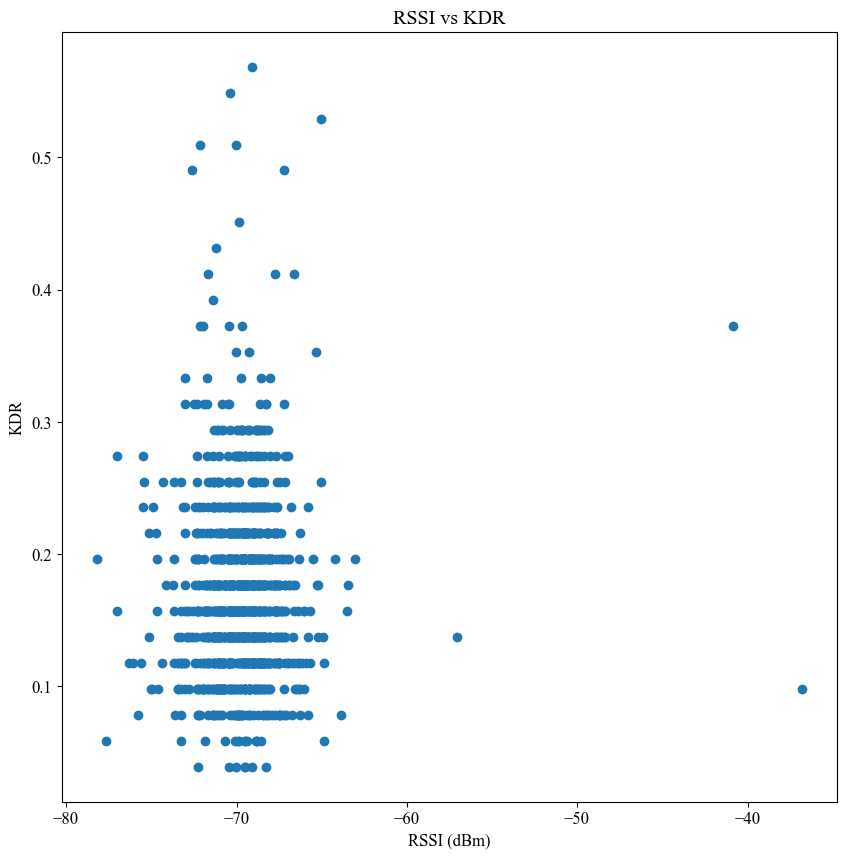

In [31]:
import greycode_quantization as quan
def kdr(uav,iot):
    uav = list(uav)
    iot = list(iot)
    count = 0
    for u,i in zip(uav,iot):
        if u != i:
            count += 1
    return count/len(uav)


testset = np.load("normalized_testing_set.npy")
trainset = np.load("normalized_training_set.npy")
model = torch.load('crnet/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_rssi_cnn_dataset(testset)
print(d_s.__len__())

kdr_yjlist = []
rssi_hylist = []

for i in range(1228):
    plot_index = i
    data, iot_original = d_s.__getitem__(plot_index)
    index = torch.from_numpy(np.array([i+1 for i in range(51)]))
    uav_original = data[1:]
    uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()

    uav_modify_squeeze = np.squeeze(uav_modify)
    uav_key = quan.quantization_1(uav_modify_squeeze,2,13,0)

    iot_original_squeeze = np.squeeze(iot_original.detach().numpy())
    iot_key = quan.quantization_1(iot_original_squeeze,2,13,0)

    kdr_yjlist.append([i, kdr(uav_key,iot_key)])
    rssi_hylist.append([i, d_s.__getRssi__(plot_index)[0]*(-28+85)-85])

# print(kdr_yjlist)
# print(rssi_hylist)

rssi_hylist.sort(key = lambda x:x[1])
print(rssi_hylist)

kdr_list = []
for i in rssi_hylist:
    kdr_list.append(kdr_yjlist[i[0]][1])


plt.figure(figsize=(10,10))
plt.scatter([i[1] for i in rssi_hylist],kdr_list)
# plt.scatter([i[1] for i in rssi_hylist],[i[1] for i in kdr_yjlist])
plt.xlabel('RSSI (dBm)')
plt.ylabel('KDR')
plt.title('RSSI vs KDR')
# plt.xlim(-85,-28)
# plt.ylim(0,0.3)
plt.show()

# data, iot_original = d_s.__getitem__(plot_index)
# index = torch.from_numpy(np.array([i+1 for i in range(51)]))
# uav_original = data[0][0][1:]
# uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()

# uav_modify_squeeze = np.squeeze(uav_modify)
# uav_key = quan.quantization_1(uav_modify_squeeze,2,13,0)

# iot_original_squeeze = np.squeeze(iot_original.detach().numpy())
# iot_key = quan.quantization_1(iot_original_squeeze,2,13,0)

# print(kdr(uav_key,iot_key))
# 
